<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/transfer_scooter2_20211028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import glob
import os
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

## 讀取 google drive圖檔 :

In [32]:
# 600以上 : S2、GP、KRV、FIDDLE、SR、活力、新名流、DRG、新迪爵、LIMI、六代勁戰
s2 = glob.glob("./原始照片(含外拍及網路)/GOGORO_S2/*") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*") 

gp = glob.glob("./原始照片(含外拍及網路)/KYMCO_GP/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_GP_125_裁/*") 

krv = glob.glob("./原始照片(含外拍及網路)/KYMCO_KRV/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_KRV_裁/*")

fiddle = glob.glob("./原始照片(含外拍及網路)/SYM_FIDDLE/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("./原始照片(含外拍及網路)/SYM_JET_SR/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SR_125_裁/*")

vivo = glob.glob("./原始照片(含外拍及網路)/SYM_活力/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_活力_125_裁/*")

famous = glob.glob("./原始照片(含外拍及網路)/KYMCO_新名流/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_新名流125_裁/*")

drg = glob.glob("./原始照片(含外拍及網路)/SYM_DRG/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_DRG_裁/*") 

duke = glob.glob("./原始照片(含外拍及網路)/SYM_新迪爵/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_新迪爵_125 _裁/*")

limi = glob.glob("./原始照片(含外拍及網路)/YAMAHA_LIMI/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("./原始照片(含外拍及網路)/YAMAHA_六代勁戰/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/*")







In [33]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
})
df

,path,ans
0,./原始照片(含外拍及網路)/GOGORO_S2/180831qbt797we2t_medi...,0
1,./原始照片(含外拍及網路)/GOGORO_S2/gogoro-s2-實車照.001.jpeg,0
2,./原始照片(含外拍及網路)/GOGORO_S2/864ea641ae77f460bf174...,0
3,./原始照片(含外拍及網路)/GOGORO_S2/02_s2_abs_indigo_05_f...,0
4,./原始照片(含外拍及網路)/GOGORO_S2/864ea641ae77f460bf174...,0
...,...,...
9411,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242123753...,10
9412,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242132239...,10
9413,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242140840...,10
9414,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242150895...,10


#### 偷別人卷積網路 :
###### google keras application

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16  # 偷別人眼睛
cnn = VGG16(include_top=False, input_shape=(224, 224, 3))
cnn.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

##### 高參數 =>訓練資料要多
##### 低參數 =>訓練資料要少

#####開始疊層數

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
cnn.layers

In [36]:
for l in cnn.layers:
  l.trainable = False  # cnn 已經是訓練好的了，所以先凍住cnn的參數 ，只訓練後面的mlp的參數 # 要在 compile 前設

layers = [
          BatchNormalization(),
          GlobalAveragePooling2D(),
          Dense(11, activation="softmax")
]
model = Sequential(cnn.layers + layers) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

##### 模型 compile

In [37]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

###### 先看一下圖片

[[[-42.939003  -60.779     -65.68     ]
  [-41.939003  -59.779     -64.68     ]
  [-38.939003  -56.779     -61.68     ]
  ...
  [111.061     106.221     107.32     ]
  [106.061     102.221     104.32     ]
  [100.061      97.221      99.32     ]]

 [[-39.939003  -57.779     -62.68     ]
  [-41.939003  -59.779     -64.68     ]
  [-40.939003  -58.779     -63.68     ]
  ...
  [138.061     129.22101   124.32     ]
  [137.061     128.22101   125.32     ]
  [133.061     124.221     122.32     ]]

 [[-36.939003  -54.779     -59.68     ]
  [-40.939003  -58.779     -63.68     ]
  [-39.939003  -57.779     -62.68     ]
  ...
  [130.061     122.221     120.32     ]
  [127.061     120.221     118.32     ]
  [129.061     122.221     120.32     ]]

 ...

 [[ 56.060997   39.221      34.32     ]
  [ 59.060997   45.221      40.32     ]
  [ 63.060997   49.221      44.32     ]
  ...
  [  9.060997    4.2210007   6.3199997]
  [ 11.060997    7.2210007   9.32     ]
  [  7.060997    2.2210007   5.3199997]]

 [

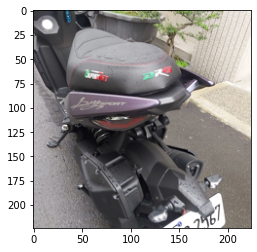

In [38]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# import 匯入 當初預處理的方式
from tensorflow.keras.applications.vgg16 import preprocess_input 
p = df["path"]
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)
# VGG16 的資料是怎麼預處理的 ? google preprocess_input github
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)

### generator

In [39]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [40]:
def data_generator(x, y, batch_size=21):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
print(x_gen.shape)
print(y_gen.shape)
print(x_gen)
print(y_gen)


(21, 224, 224, 3)
(21,)
[[[[-4.3939003e+01 -4.4778999e+01 -5.0680000e+01]
   [-5.3939003e+01 -4.8778999e+01 -5.7680000e+01]
   [-3.9939003e+01 -3.6778999e+01 -4.5680000e+01]
   ...
   [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
   [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
   [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]]

  [[-2.4939003e+01 -2.9778999e+01 -3.5680000e+01]
   [-4.4939003e+01 -4.2778999e+01 -5.0680000e+01]
   [-4.8939003e+01 -4.5778999e+01 -5.4680000e+01]
   ...
   [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
   [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
   [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]]

  [[-4.4939003e+01 -5.3778999e+01 -5.9680000e+01]
   [-3.1939003e+01 -3.1778999e+01 -3.8680000e+01]
   [-4.5939003e+01 -4.2778999e+01 -5.0680000e+01]
   ...
   [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
   [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]
   [ 1.5106100e+02  1.3822101e+02  1.3132001e+02]]

  ...

  [[-1.6939003e+01 -1.0778999e+01 -1.26800

In [41]:
s2_x = x[y == 0]
gp_x = x[y == 1]
krv_x = x[y == 2]
fiddle_x = x[y == 3]
sr_x = x[y == 4]
vivo_x = x[y == 5]
famous_x = x[y == 6]
drg_x = x[y == 7]
duke_x = x[y == 8]
limi_x = x[y == 9]
gryphus6_x = x[y == 10]

print("s2 共:", len(s2_x))
print("gp 共:", len(gp_x))
print("krv 共:", len(krv_x))
print("fiddle 共:", len(fiddle_x))
print("sr 共:", len(sr_x))
print("vivo 共:", len(vivo_x))
print("famous 共:", len(famous_x))
print("drg 共:", len(drg_x))
print("duke 共:", len(duke_x))
print("limi 共:", len(limi_x))
print("gryphus6 共:", len(gryphus6_x))


s2 共: 699
gp 共: 636
krv 共: 816
fiddle 共: 1206
sr 共: 638
vivo 共: 736
famous 共: 815
drg 共: 810
duke 共: 1098
limi 共: 749
gryphus6 共: 1213


In [87]:
from sklearn.model_selection import train_test_split
import numpy as np

 # "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    # "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    # + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
scooters = [s2_x, gp_x, krv_x, fiddle_x, sr_x, vivo_x, famous_x, drg_x, duke_x, limi_x, gryphus6_x]
scts_nums = []

for i in scooters:
  a = np.random.choice(i, 630, replace=False)
  b, c = train_test_split(a, test_size=0.1)
  num = (a, b, c)
  scts_nums.append(num)
# print(len(scts_nums[:][]))
# S2_380 = np.random.choice(S2_x, 380, replace=False)
# S2_342, S2_38 = train_test_split(S2_380, test_size=0.1)


x_train = np.concatenate([x[1] for x in scts_nums])
y_train = np.array([0] * 567 + [1]*567+[2]*567+[3]*567+[4]*567+[5]*567+[6]*567+[7]*567+[8]*567+[9]*567+[10]*567)

x_test = np.concatenate([x[2] for x in scts_nums])
y_test = np.array([0] * 63 + [1]*63+[2]*63+[3]*63+[4]*63+[5]*63+[6]*63+[7]*63+[8]*63+[9]*63+[10]*63)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6237,)
(693,)
(6237,)
(693,)


In [88]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [89]:
# 20 * 19 => 380訓練
# 5 * 19 => 38測試
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=5, restore_best_weights=True),
             ModelCheckpoint("/content/drive/MyDrive/Tebame_第四組_機車辨識/機車辨識模型檔/VGG16_10款_1028_宇.h5", save_best_only=True)
]

model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=100,
    validation_data=test_generator,
    validation_steps=3, 
    callbacks=callbacks
                    )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
30/30 [==============================] - 263s 8s/step - loss: 2.3542 - acc: 0.1317 - val_loss: 2.4975 - val_acc: 0.2381
Epoch 2/100
30/30 [==============================] - 217s 7s/step - loss: 2.1608 - acc: 0.2968 - val_loss: 1.8934 - val_acc: 0.4127
Epoch 3/100
30/30 [==============================] - 204s 7s/step - loss: 1.9779 - acc: 0.4079 - val_loss: 1.6542 - val_acc: 0.5079
Epoch 4/100
30/30 [==============================] - ETA: 0s - loss: 1.7969 - acc: 0.5476

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 186s 6s/step - loss: 1.7969 - acc: 0.5476 - val_loss: 1.6851 - val_acc: 0.5873
Epoch 5/100
30/30 [==============================] - 173s 6s/step - loss: 1.6437 - acc: 0.5841 - val_loss: 1.4927 - val_acc: 0.5714
Epoch 6/100
30/30 [==============================] - 157s 5s/step - loss: 1.5590 - acc: 0.6095 - val_loss: 1.3206 - val_acc: 0.6667
Epoch 7/100
30/30 [==============================] - 153s 5s/step - loss: 1.5102 - acc: 0.6016 - val_loss: 1.4694 - val_acc: 0.5079
Epoch 8/100
30/30 [==============================] - 134s 5s/step - loss: 1.3678 - acc: 0.6698 - val_loss: 1.5186 - val_acc: 0.5714
Epoch 9/100
30/30 [==============================] - 130s 4s/step - loss: 1.3216 - acc: 0.6667 - val_loss: 1.3049 - val_acc: 0.6349
Epoch 10/100
30/30 [==============================] - 130s 4s/step - loss: 1.2925 - acc: 0.6444 - val_loss: 1.2020 - val_acc: 0.7302
Epoch 11/100
30/30 [==============================] - 122s 4s/step - loss: 1.2286 - acc

In [90]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)



/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [91]:
pre = pre.argmax(axis=1)

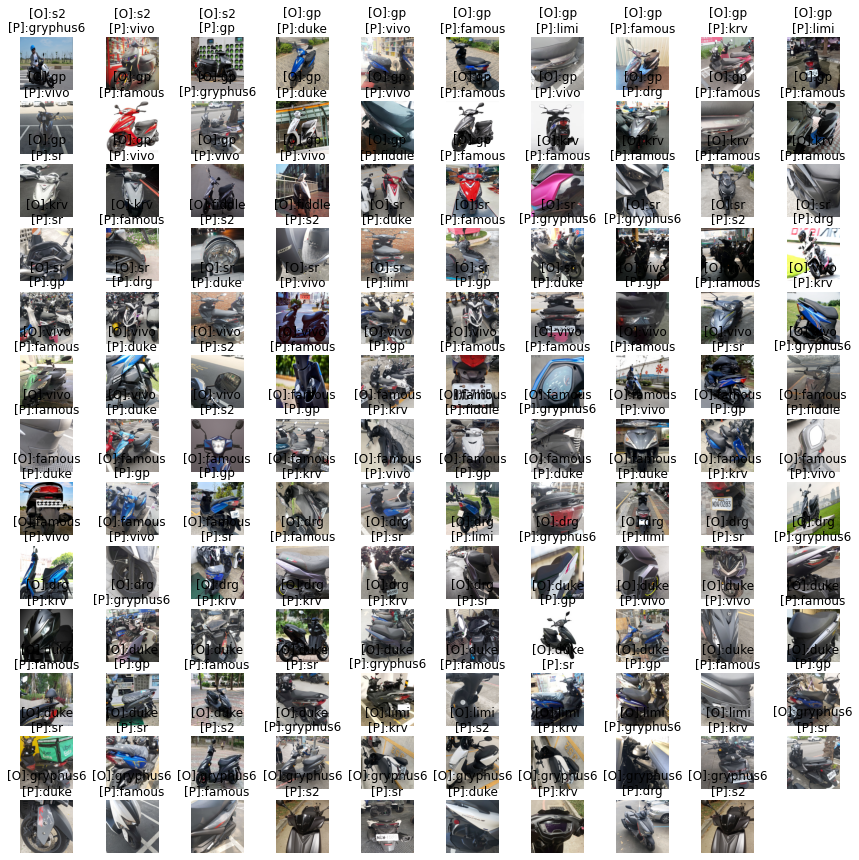

In [92]:
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]
# s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
idx = np.nonzero(pre != y_test)[0]
pre_false_img = ori_imgs[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(15, 15))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])


In [94]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(11)],
        columns=["{}(預測)".format(trans[i]) for i in range(11)]
)

,s2(預測),gp(預測),krv(預測),fiddle(預測),sr(預測),vivo(預測),famous(預測),drg(預測),duke(預測),limi(預測),gryphus6(預測)
s2(正確),60,1,0,0,0,1,0,0,0,0,1
gp(正確),0,40,1,1,1,7,7,1,2,2,1
krv(正確),0,0,57,0,1,0,5,0,0,0,0
fiddle(正確),2,0,0,61,0,0,0,0,0,0,0
sr(正確),1,2,0,0,50,1,1,2,3,1,2
vivo(正確),2,2,1,0,1,47,7,0,2,0,1
famous(正確),0,5,3,2,1,5,43,0,3,0,1
drg(正確),0,0,4,0,3,0,1,50,0,2,3
duke(正確),1,4,0,0,4,2,5,0,45,0,2
limi(正確),1,0,3,0,0,0,0,0,0,58,1


Enter:https://cf.shopee.tw/file/7c3173140147c412833713494350a2ee


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


預測: fiddle
機率: [2.0941282e-02 7.2033522e-03 4.2134451e-04 9.2618483e-01 3.0051761e-03
 2.9580245e-02 1.6737158e-03 1.5491827e-03 5.9483992e-03 2.0716740e-03
 1.4207195e-03]


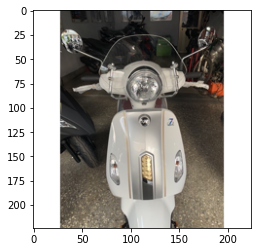

In [119]:
import requests
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)
#trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]

In [ ]:
#01:33:12